Often, accuracy is a common metric for ML learning algorithm. However, accuracy is considered as optimistic metric since it assumses target class has normal distribution, particularly balance among target classes. Real world problem is rarely followed this assumption, other metric measurements are suggested. The first part of this tutorial visualizes how distribution among classes presented. 

In [6]:
%pylab inline
import matplotlib.pylab as plt
from sklearn.datasets import load_iris

Populating the interactive namespace from numpy and matplotlib


C:\Users\trisi\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt', 'colors', 'ceil', 'floor']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
                   'Diluted wines', 'Proline']
df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values
# what are target classes?
print('Class labels', np.unique(df['Class label']))

Class labels [1 2 3]


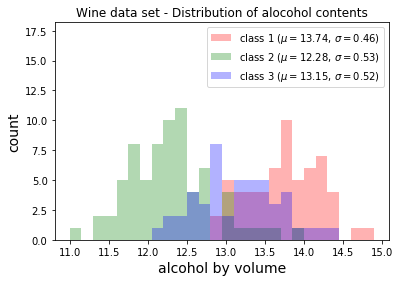

In [10]:
from math import floor, ceil 

# the order of the colors for each histogram
colors = ('red', 'green', 'blue')

# bin width of the histogram in steps of 0.15
bins = np.arange(floor(min(X[:,0])), ceil(max(X[:,0])), 0.15)

# max count for a particular bin for all classes combined
max_bin = max(np.histogram(X[:,0], bins=bins)[0])

for label,color in zip(range(1,4), colors):
    mean = np.mean(X[:,0][y == label]) # class sample mean
    stdev = np.std(X[:,0][y == label]) # class standard deviation
    hist(X[:,0][y == label], bins=bins, alpha=0.3, 
             label='class {} ($\mu={:.2f}$, $\sigma={:.2f}$)'.format(label, mean, stdev), color=color)

ylim([0, max_bin*1.3])
title('Wine data set - Distribution of alocohol contents')
xlabel('alcohol by volume', fontsize=14)
ylabel('count', fontsize=14)
legend(loc='upper right')

show()